# Sarthak Bathla  ( 04114803121 )
## Q2) Write your own implementation for knn with 4 different distance metrics and check on Iris dataset.

### Importing required libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Making a KNN class to define my own KNN model implementation

In [2]:
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def _chebyshev_distance(self, x1, x2):
        return np.max(np.abs(x1 - x2))

    def _minkowski_distance(self, x1, x2, p):
        return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

    def _get_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self._euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self._manhattan_distance(x1, x2)
        elif self.distance_metric == 'chebyshev':
            return self._chebyshev_distance(x1, x2)
        elif self.distance_metric == 'minkowski':
            return self._minkowski_distance(x1, x2, p=2)  # p=2 for Euclidean distance
        else:
            raise ValueError("Invalid distance metric. Please choose from 'euclidean', 'manhattan', 'chebyshev', or 'minkowski'.")

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = []
            for i, x_train in enumerate(self.X_train):
                distance = self._get_distance(x, x_train)
                distances.append((self.y_train[i], distance))
            distances.sort(key=lambda x: x[1])
            neighbors = [dist[0] for dist in distances[:self.k]]
            prediction = max(set(neighbors), key=neighbors.count)
            predictions.append(prediction)
        return predictions

### Loading the Iris Data and fitting my model on it.

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Define a list of distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Initialize lists to store accuracy scores for different distance metrics
accuracy_scores = []

# Iterate over each distance metric
for metric in distance_metrics:
    # Initialize KNN classifier with the current distance metric
    knn = KNN(k=3, distance_metric=metric)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy score and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)


In [7]:
for metric, accuracy in zip(distance_metrics, accuracy_scores):
    print(f'Accuracy with {metric} distance metric: {accuracy:.4f}')

Accuracy with euclidean distance metric: 1.0000
Accuracy with manhattan distance metric: 1.0000
Accuracy with chebyshev distance metric: 1.0000
Accuracy with minkowski distance metric: 1.0000


### Plotting a graph to visualize accuracy score on different distance metrics.

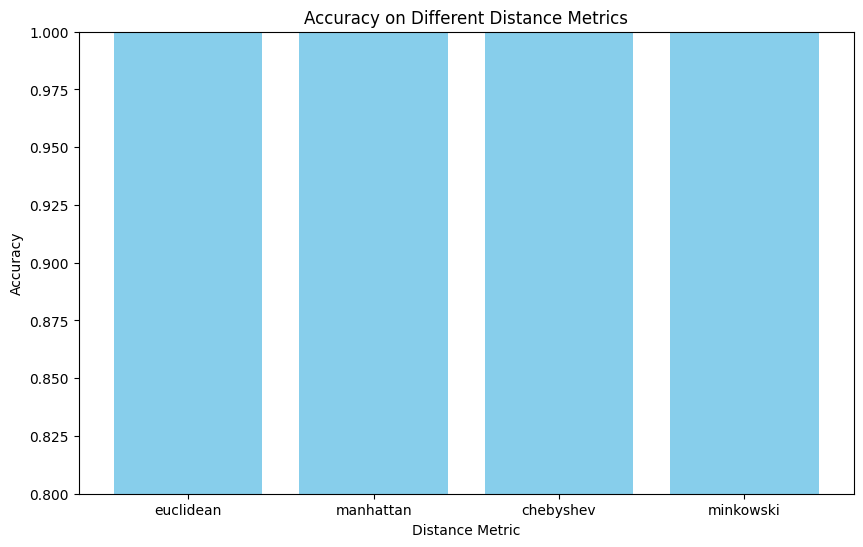

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(distance_metrics, accuracy_scores, color='skyblue')
plt.title('Accuracy on Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set y-axis limit for better visualization
plt.show()